# Clustering Synthesized Data with Gaussian Mixture Models via Expectation-Maximization Algorithm
Name: Xihao Cao


Date: 09/25/2022

### (1) Simulate 3D data

In [3]:
# Importation
import numpy as np
import sklearn.mixture as skm
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib widget
%matplotlib inline

# Generate synthetic 3-dimension data
# Reference: https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e
N,D = 200, 3 # number of points and dimenstinality


means = np.array([[0.4, 0.3, 0.4],
                  [0, 0.5, 0.5],
                  [0.7, 0.7, 0.4]])
covs = np.array([np.diag([0.01, 0.01, 0.03]),
                 np.diag([0.01, 0.05, 0.01]),
                 np.diag([0.03, 0.07, 0.01])])
n_gaussians = means.shape[0]



# Next, we generate points using a multivariate normal distribution
points = []
for i in range(n_gaussians):
    x = np.random.multivariate_normal(means[i], covs[i], N)
    points.append(x)
points = np.concatenate(points)

### (2) Cluster the data using Guassian Mixture Models with Expectation-Maximization (EM) algorithm

In [4]:
#Fit the Guassian Mixture Model using Expectation-Maximization (EM) algorithm with 5, 12, 30 iterations
#Reference: https://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
gmm1 = skm.GaussianMixture(n_components=n_gaussians, covariance_type='diag', max_iter = 5)
gmm1.fit(points)

gmm2 = skm.GaussianMixture(n_components=n_gaussians, covariance_type='diag', max_iter = 12)
gmm2.fit(points)

gmm3 = skm.GaussianMixture(n_components=n_gaussians, covariance_type='diag', max_iter = 30)
gmm3.fit(points)

GaussianMixture(covariance_type='diag', max_iter=30, n_components=3)

The iteration counts for our Gaussian Mixture Models (GMM) are 5, 12, and 30, respectively. Generally, a higher number of Expectation-Maximization iterations implies a better model fit, so we anticipate that GMM3 will provide the best data fitting.

### （3）Visualize the Guassian Mixture Models

In [5]:
# This is a visualization function used to plot the GMM
# Reference: https://github.com/sitzikbs/gmm_tutorial/blob/master/visualization.py
def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()
    
    
    
def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

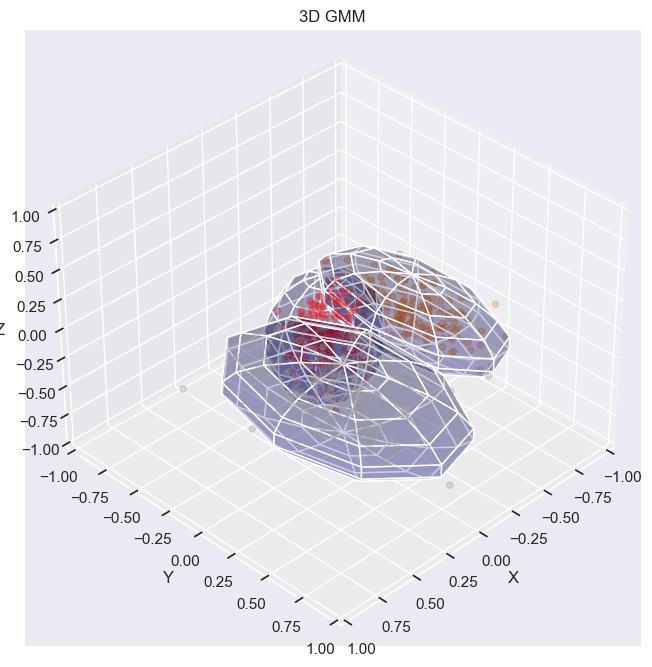

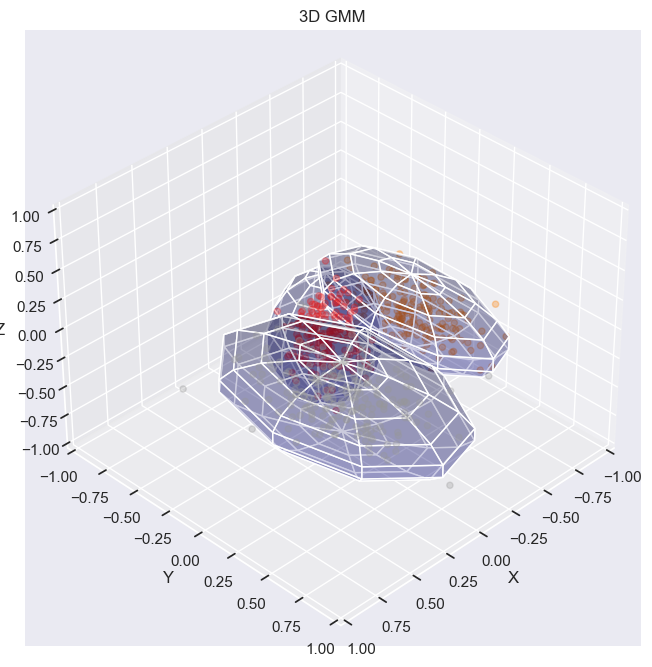

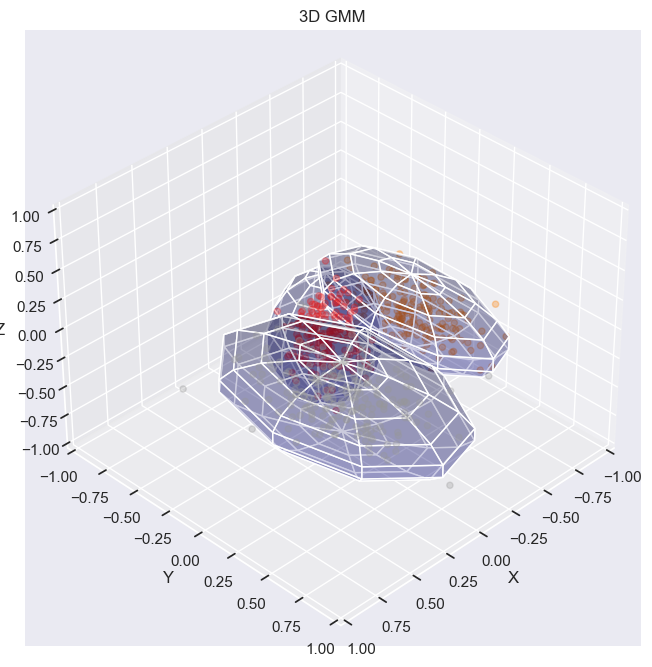

In [6]:
# plot the three GMM models and their clustered data
visualize_3d_gmm(points, gmm1.weights_, gmm1.means_.T, np.sqrt(gmm1.covariances_).T)

visualize_3d_gmm(points, gmm2.weights_, gmm2.means_.T, np.sqrt(gmm2.covariances_).T)

visualize_3d_gmm(points, gmm3.weights_, gmm3.means_.T, np.sqrt(gmm3.covariances_).T)

As we can see, as the EM iteration times increase, the model gets a better ability to cluster the data. However, since the simulated data are designed to have clear boundaries, so it does not need that much of iterations to get the optimal model, so the difference between each iterations are not huge.